In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pylab as plt
import numpy as np
import pandas as pd

from multifile_lda import MultifileLDA

Create a new multifile LDA object and load the input files for beer1, 2, 3 (ignore the misleading filenames).

In [2]:
input_set = [
    ('input/beer3pos_fragments_1.csv', 'input/beer3pos_losses_1.csv', 'input/beer3pos_ms1_1.csv','input/beer3pos_ms2_1.csv'),
    ('input/beer3pos_fragments_2.csv', 'input/beer3pos_losses_2.csv', 'input/beer3pos_ms1_2.csv','input/beer3pos_ms2_2.csv'),
    ('input/beer3pos_fragments_3.csv', 'input/beer3pos_losses_3.csv', 'input/beer3pos_ms1_3.csv','input/beer3pos_ms2_3.csv')
]

Normalisation Method 1
=============

Load and normalise data the same way as before in the single-file version: within each fragmentation spectrum, we divide the MS2 intensities by the max MS2 intensity in the same spectrum and multiplying by *scaling_factor*. Let's call this normalisation method 1.

In [3]:
scaling_factor=100
normalise=1

lda = MultifileLDA()
lda.load_all(input_set, scaling_factor, normalise)

Loading file 0 data shape (700, 2604)
Loading file 1 data shape (808, 2604)
Loading file 2 data shape (737, 2604)


Run multifile LDA on all the 3 files.

In [4]:
K = 300
n_samples = 200
n_burn = 0
n_thin = 1
alpha = 50.0/K
beta = 0.1
lda.run(K, alpha, beta, n_burn, n_samples, n_thin)

Initialising 
 - file 0 .......
 - file 1 .........
 - file 2 ........

Using Numpy for multi-file LDA sampling
Sample 1 ..............................................
Sample 2 ..............................................
Sample 3 ..............................................
Sample 4 ..............................................
Sample 5 ..............................................
Sample 6 ..............................................
Sample 7 ..............................................
Sample 8 ..............................................
Sample 9 ..............................................
Sample 10 ..............................................
Sample 11 ..............................................
Sample 12 ..............................................
Sample 13 ..............................................
Sample 14 ..............................................
Sample 15 ..............................................
Sample 16 ................................

So, in this model, each file has its own document-topic distributions, but we have a topic-word distribution shared across files. We print these out.

In [5]:
lda.print_top_words()

Topic 0: loss_103.02694 loss_173.06872 fragment_74.06037 loss_197.08975 loss_17.02628 fragment_248.11299 loss_159.08931 loss_18.0106 loss_142.07391
Topic 1: loss_162.05208 loss_59.07314 loss_162.05319 fragment_97.02839 loss_64.01503 loss_105.07777 loss_59.03644 loss_105.04248 loss_74.00031
Topic 2: loss_74.00031 fragment_114.10276 fragment_131.12916 fragment_157.10842 fragment_60.05585 fragment_97.07642 fragment_96.99489 fragment_205.06501 fragment_265.05123
Topic 3: fragment_276.14359 loss_189.13589 loss_59.01314 fragment_218.10321 loss_18.00808 loss_89.08394 loss_103.03871 fragment_430.19171 loss_71.05783
Topic 4: fragment_147.04378 loss_113.06873 fragment_185.09251 loss_94.02612 fragment_273.14302 fragment_212.10734 fragment_123.05507 fragment_59.04943 fragment_117.07398
Topic 5: loss_101.04763 loss_46.00593 fragment_220.10874 fragment_262.12855 fragment_166.04979 fragment_95.03696 fragment_138.09146 fragment_149.04778 fragment_134.02314
Topic 6: loss_46.00543 loss_116.04646 loss_17

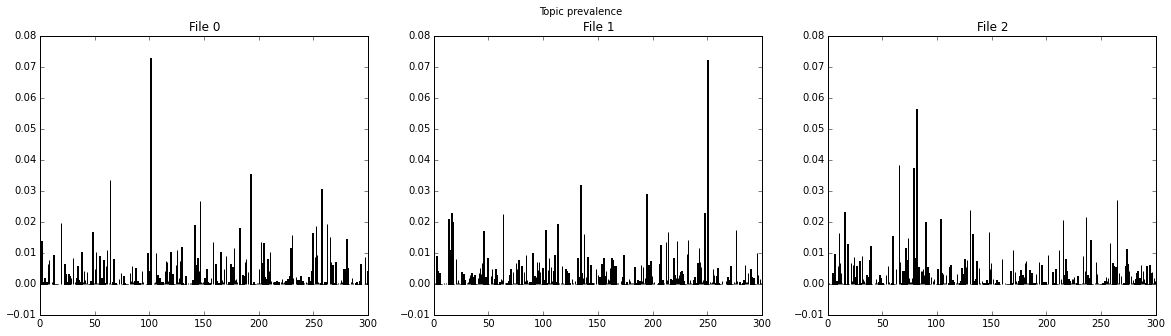

In [6]:
lda.plot_e_alphas()

Normalisation Method 2
=============

Alternative normalisation: same as method 1, but in the matrix, we multiply each column, corresponding to each spectrum, by (parent intensity/max MS1 intensity) in the file. This way, we retain the information from differentially-expressed metabolites across different files.

In [7]:
scaling_factor=100
normalise=2

lda = MultifileLDA()
lda.load_all(input_set, scaling_factor, normalise)

Loading file 0 data shape (700, 2604)
Loading file 1 data shape (808, 2604)
Loading file 2 data shape (737, 2604)


In [8]:
K = 300
n_samples = 200
n_burn = 0
n_thin = 1
alpha = 50.0/K
beta = 0.1
lda.run(K, alpha, beta, n_burn, n_samples, n_thin)

Initialising 
 - file 0 .......
 - file 1 .........
 - file 2 ........

Using Numpy for multi-file LDA sampling
Sample 1 .
Sample 2 .
Sample 3 .
Sample 4 .
Sample 5 .
Sample 6 .
Sample 7 .
Sample 8 .
Sample 9 .
Sample 10 .
Sample 11 .
Sample 12 .
Sample 13 .
Sample 14 .
Sample 15 .
Sample 16 .
Sample 17 .
Sample 18 .
Sample 19 .
Sample 20 .
Sample 21 .
Sample 22 .
Sample 23 .
Sample 24 .
Sample 25 .
Sample 26 .
Sample 27 .
Sample 28 .
Sample 29 .
Sample 30 .
Sample 31 .
Sample 32 .
Sample 33 .
Sample 34 .
Sample 35 .
Sample 36 .
Sample 37 .
Sample 38 .
Sample 39 .
Sample 40 .
Sample 41 .
Sample 42 .
Sample 43 .
Sample 44 .
Sample 45 .
Sample 46 .
Sample 47 .
Sample 48 .
Sample 49 .
Sample 50 .
Sample 51 .
Sample 52 .
Sample 53 .
Sample 54 .
Sample 55 .
Sample 56 .
Sample 57 .
Sample 58 .
Sample 59 .
Sample 60 .
Sample 61 .
Sample 62 .
Sample 63 .
Sample 64 .
Sample 65 .
Sample 66 .
Sample 67 .
Sample 68 .
Sample 69 .
Sample 70 .
Sample 71 .
Sample 72 .
Sample 73 .
Sample 74 .
Sample 75

In [9]:
lda.print_top_words()

Topic 0: fragment_120.08043 fragment_292.11654 loss_30.01058 fragment_55.01819 fragment_69.0701 loss_111.03123 fragment_153.1017 fragment_153.09094 fragment_153.06942
Topic 1: loss_17.02628 loss_177.06343 fragment_116.07117 loss_88.01588 loss_199.08395 fragment_152.10754 fragment_153.06942 fragment_153.06584 fragment_153.05496
Topic 2: loss_56.06218 loss_77.04746 loss_197.08975 fragment_152.10754 fragment_153.09094 fragment_153.06942 fragment_153.06584 fragment_153.05496 fragment_153.04074
Topic 3: fragment_73.06469 fragment_152.05608 fragment_154.04955 fragment_154.02582 fragment_153.1017 fragment_153.09094 fragment_153.06942 fragment_153.06584 fragment_153.05496
Topic 4: loss_113.08378 loss_199.08395 fragment_152.05256 fragment_153.1017 fragment_153.09094 fragment_153.06942 fragment_153.06584 fragment_153.05496 fragment_153.04074
Topic 5: loss_59.04757 loss_147.05319 loss_143.05808 fragment_152.08094 fragment_153.06584 fragment_153.05496 fragment_153.04074 fragment_153.01917 fragment

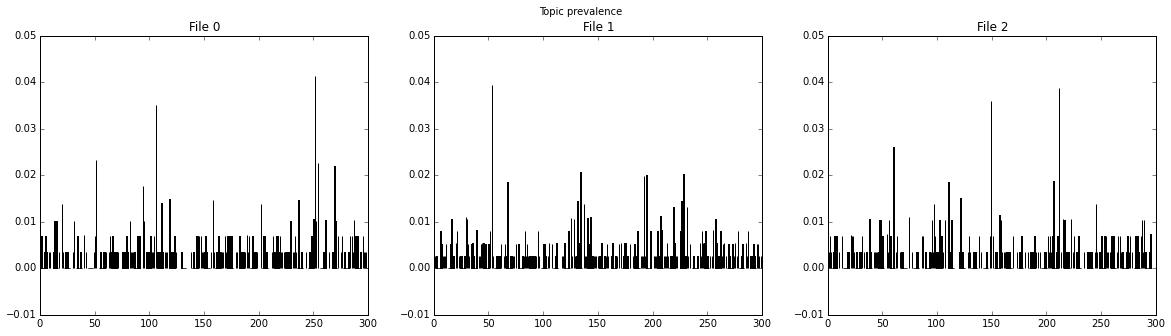

In [10]:
lda.plot_e_alphas()